# Numerical Calculus

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/numericalCalculus.ipynb)

If you have taken a calculus class, you probably know what a derivative and anti-derivative are and how to calculate them. (If you haven't taken calculus, you will understand these concepts soon.)  The techniques that you learned in calculus class are called analytical methods, which means that  the derivative (or anti-derivative) are calculated using pencil, paper, and some mathematical rules to guide you.  In this chapter, we will explore how to find the derivative (or anti-derivative) of a discrete set of data rather than a continuous function.  

# Numerical Derivatives
Let's start with a simple data set that gives the position of an object dropped from a tall building at various times.  


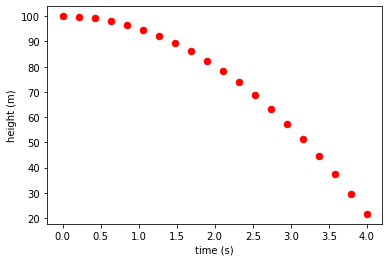

In [2]:
#| echo: false
from numpy import linspace
from matplotlib import pyplot as plt

t = linspace(0,4,20)
h = 100
y = 100 -4.9 * t**2

plt.plot(t,y,'r.',ms = 13)
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

There are three possible ways that we could find the slope at a single point: the forward difference, the backward difference, and the center difference. 
$$
f'(x) = {f(x + h) - f(x - h)\over 2h} \text{ (center-difference)}
$$
$$
f'(x) = {f(x + h) - f(x )\over h} \text{ (forward-difference)}
$$
$$
f'(x) = {f(x) - f(x - h)\over h} \text{ (backward-difference)}
$$
We illustrate them in the figure below.

(0.75, 3.5, 6.5, 8.25)

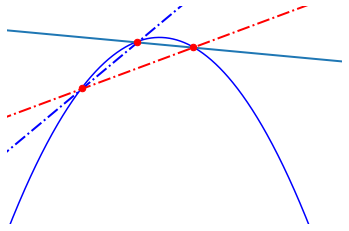

In [3]:
#| echo: false
#| layout-ncol: 1
#| fig-cap: 
#|   - "Figure 1: Illustration of the forward difference derivative (blue solid line), the backward difference (blue dashed line) and the center difference (red dashed line)"
#| fig-cap-location: bottom



from numpy import linspace
from matplotlib import pyplot as plt

x = linspace(0,5,12)
y = -(x - 2)**2 + 8

xDense = linspace(0,5,1000)
yDense = -(xDense - 2)**2 + 8
slopeOne = (y[5] - y[3])/(x[5] - x[3])
slopeTwo = (y[4] - y[3])/(x[4] - x[3])
slopeThree = (y[5] - y[4])/(x[5] - x[4])


lineOne =  slopeOne * xDense + 7.09
lineTwo =  slopeTwo * xDense + 6.47

lineThree =  slopeThree * xDense + 8.125

plt.plot(xDense,yDense,'b')
plt.plot(xDense,lineOne,'r-.',lw = 2)
plt.plot(xDense,lineTwo,'b-.',lw = 2)
plt.plot(xDense,lineThree,lw = 2)
plt.plot(x[3:6],y[3:6],'r.',ms = 13)
plt.ylim(6.5,8.25)
plt.xlim(0.75,3.5)
plt.axis("off")


Clearly, the centered-difference is the best way to calculate slopes and it is the method you should always strive for.  Let's see how to use the center-difference equation in python to calculate the slope at every point in a data set.


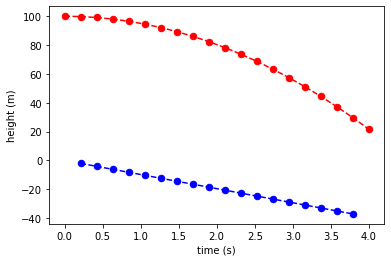

In [4]:
from numpy import linspace,array
from matplotlib import pyplot as plt

t = array([0.0, 0.21052631578947367, 0.42105263157894735, 0.631578947368421, 0.8421052631578947, 1.0526315789473684, 1.263157894736842, 1.4736842105263157, 1.6842105263157894, 1.894736842105263, 2.1052631578947367, 2.3157894736842106, 2.526315789473684, 2.7368421052631575, 2.9473684210526314, 3.1578947368421053, 3.3684210526315788, 3.578947368421052, 3.789473684210526, 4.0])
y = array([100.0, 99.78282548476454, 99.13130193905818, 98.04542936288088, 96.52520775623269, 94.57063711911357, 92.18171745152354, 89.35844875346261, 86.10083102493076, 82.40886426592797, 78.2825484764543, 73.72188365650969, 68.72686980609419, 63.29750692520776, 57.43379501385042, 51.13573407202215, 44.403324099722994, 37.23656509695292, 29.63545706371191, 21.599999999999994])

dt = t[1] - t[0]
yprime = (y[2:] - y[:-2])/(2 * dt)

plt.plot(t,y,'r--.',ms = 13)
plt.plot(t[1:-1],yprime,'b--.',ms = 13)
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

Pay special attention to this line: `yprime = (y[2:] - y[:-2])/(2 * dt)`. By slicing the array of function values carefully, I can calculate the center-difference derivative for all points in the data set simultaneously. (see figure below)  Also note that when using the center difference formula, you are unable to calculate the slope at the endpoints of the dataset.  Hence, your array of slope values is two shorter than your original list.  When I plot the derivative, the time array has to be trimmed to get the slopes to match up correctly with times.


![Illustration of center-difference derivative on a discrete grid. Using array slicing the slope can be calculated at all points simultaneously.](https://lancejnelson.github.io/PH135/figures/centerdifference.png){width=50%}

Here is another example for a dataset that exhibits a few more features.  Take a second to verify that the blue function is giving the slope of the red function.

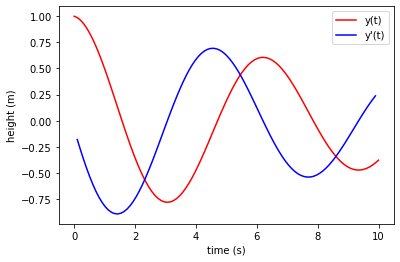

In [5]:
from numpy import array

t = array([0.0, 0.10204081632653061, 0.20408163265306123, 0.30612244897959184, 0.40816326530612246, 0.5102040816326531, 0.6122448979591837, 0.7142857142857143, 0.8163265306122449, 0.9183673469387755, 1.0204081632653061, 1.1224489795918369, 1.2244897959183674, 1.3265306122448979, 1.4285714285714286, 1.5306122448979593, 1.6326530612244898, 1.7346938775510203, 1.836734693877551, 1.9387755102040818, 2.0408163265306123, 2.142857142857143, 2.2448979591836737, 2.3469387755102042, 2.4489795918367347, 2.5510204081632653, 2.6530612244897958, 2.7551020408163267, 2.857142857142857, 2.9591836734693877, 3.0612244897959187, 3.163265306122449, 3.2653061224489797, 3.36734693877551, 3.4693877551020407, 3.5714285714285716, 3.673469387755102, 3.7755102040816326, 3.8775510204081636, 3.979591836734694, 4.081632653061225, 4.183673469387755, 4.285714285714286, 4.387755102040816, 4.4897959183673475, 4.591836734693878, 4.6938775510204085, 4.795918367346939, 4.8979591836734695, 5.0, 5.1020408163265305, 5.204081632653061, 5.3061224489795915, 5.408163265306123, 5.510204081632653, 5.612244897959184, 5.714285714285714, 5.816326530612245, 5.918367346938775, 6.020408163265306, 6.122448979591837, 6.224489795918368, 6.326530612244898, 6.428571428571429, 6.530612244897959, 6.63265306122449, 6.73469387755102, 6.836734693877551, 6.938775510204081, 7.040816326530613, 7.142857142857143, 7.244897959183674, 7.346938775510204, 7.448979591836735, 7.551020408163265, 7.653061224489796, 7.755102040816327, 7.857142857142858, 7.959183673469388, 8.061224489795919, 8.16326530612245, 8.26530612244898, 8.36734693877551, 8.46938775510204, 8.571428571428571, 8.673469387755102, 8.775510204081632, 8.877551020408163, 8.979591836734695, 9.081632653061225, 9.183673469387756, 9.285714285714286, 9.387755102040817, 9.489795918367347, 9.591836734693878, 9.693877551020408, 9.795918367346939, 9.89795918367347, 10.0])

y = array([1.0, 0.9867106049449835, 0.9633896110036303, 0.930441653845362, 0.8883647907109408, 0.8377438153135915, 0.7792427802562372, 0.7135968174516216, 0.641603352856869, 0.5641128165642914, 0.4820189528946211, 0.3962488375981065, 0.30775271057607917, 0.217493732695753, 0.12643777430107145, 0.03554334095074269, -0.05424826121944644, -0.1420224222596137, -0.22690029414347004, -0.30804733831471925, -0.38468127466905855, -0.4560793591162092, -0.5215849250188013, -0.5806131324972382, -0.6326558787228784, -0.6772858317939752, -0.7141595604960038, -0.743019742085619, -0.7636964401012755, -0.7761074539906521, -0.7802577519550382, -0.7762380077468505, -0.7642222711259269, -0.7444648101959878, -0.7172961718235661, -0.6831185137135822, -0.6424002684118669, -0.5956702054667365, -0.5435109631591742, -0.4865521255631921, -0.42546292419273285, -0.3609446461065957, -0.29372283206542116, -0.2245393491613234, -0.15414442227722988, -0.083288707794463, -0.012715491177467673, 0.05684691254372852, 0.12469247975946875, 0.19014444921827992, 0.2525618761933174, 0.31134570856282195, 0.36594432944772914, 0.4158585174857275, 0.4606457826610142, 0.49992404277520236, 0.5333746130575407, 0.5607444889909092, 0.5818479100925077, 0.5965672000538682, 0.6048528862341104, 0.60672310893566, 0.6022623380982411, 0.5916194219536842, 0.5750049987241208, 0.5526883085574614, 0.5249934485201562, 0.49229511855756375, 0.45501391084259973, 0.4136111988262666, 0.3685836855487481, 0.32045767334377057, 0.26978311895604673, 0.21712753928331918, 0.16306983344972584, 0.10819408672204209, 0.0530834209080176, -0.0016860456534446109, -0.05555106756061642, -0.10796691308417367, -0.15841272129543982, -0.20639652454758026, -0.2514598895714763, -0.29318213516550146, -0.33118408953590006, -0.36513135572337047, -0.3947370591710421, -0.41976405728705063, -0.4400265967682593, -0.45539141041706666, -0.4657782511379014, -0.4711598666822405, -0.47156142446092897, -0.46705940130261336, -0.45777995835259105, -0.44389682632607497, -0.4256287310064338, -0.4032363931693947, -0.3770191409801755])

from matplotlib import pyplot as plt

dt = t[1] - t[0]
yprime = (y[2:] - y[:-2])/(2 * dt)

plt.plot(t,y,'r',label = 'y(t)')
plt.plot(t[1:-1],yprime,'b',label = "y'(t)")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.legend()


### Numerical second derivatives

We can derive a formula for a second derivative as follows:

$$
\begin{align*}
f''(x) &= {f'(x + {h\over 2}) - f'(x - {h\over 2}) \over  h}\\
&= {1\over h} \left({f(x + h) - f(x)\over  h} - {f(x)  - f(x -  h) \over  h} \right)\\
&= {1\over h} \left({f(x +  h) - 2 f(x) + f(x -  h) \over  h} - {f(x)  - f'(x -  h) \over  h} \right)\\
&= {f(x +  h) - 2 f(x) + f(x -  h) \over  h^2} \\
\end{align*}
$$


And here is an example of doing this in python.


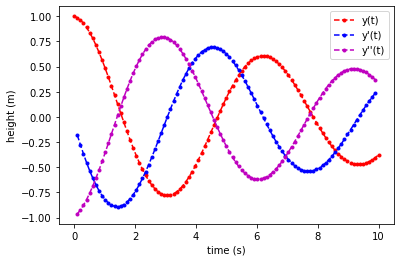

In [6]:
from numpy import array

t = array([0.0, 0.10204081632653061, 0.20408163265306123, 0.30612244897959184, 0.40816326530612246, 0.5102040816326531, 0.6122448979591837, 0.7142857142857143, 0.8163265306122449, 0.9183673469387755, 1.0204081632653061, 1.1224489795918369, 1.2244897959183674, 1.3265306122448979, 1.4285714285714286, 1.5306122448979593, 1.6326530612244898, 1.7346938775510203, 1.836734693877551, 1.9387755102040818, 2.0408163265306123, 2.142857142857143, 2.2448979591836737, 2.3469387755102042, 2.4489795918367347, 2.5510204081632653, 2.6530612244897958, 2.7551020408163267, 2.857142857142857, 2.9591836734693877, 3.0612244897959187, 3.163265306122449, 3.2653061224489797, 3.36734693877551, 3.4693877551020407, 3.5714285714285716, 3.673469387755102, 3.7755102040816326, 3.8775510204081636, 3.979591836734694, 4.081632653061225, 4.183673469387755, 4.285714285714286, 4.387755102040816, 4.4897959183673475, 4.591836734693878, 4.6938775510204085, 4.795918367346939, 4.8979591836734695, 5.0, 5.1020408163265305, 5.204081632653061, 5.3061224489795915, 5.408163265306123, 5.510204081632653, 5.612244897959184, 5.714285714285714, 5.816326530612245, 5.918367346938775, 6.020408163265306, 6.122448979591837, 6.224489795918368, 6.326530612244898, 6.428571428571429, 6.530612244897959, 6.63265306122449, 6.73469387755102, 6.836734693877551, 6.938775510204081, 7.040816326530613, 7.142857142857143, 7.244897959183674, 7.346938775510204, 7.448979591836735, 7.551020408163265, 7.653061224489796, 7.755102040816327, 7.857142857142858, 7.959183673469388, 8.061224489795919, 8.16326530612245, 8.26530612244898, 8.36734693877551, 8.46938775510204, 8.571428571428571, 8.673469387755102, 8.775510204081632, 8.877551020408163, 8.979591836734695, 9.081632653061225, 9.183673469387756, 9.285714285714286, 9.387755102040817, 9.489795918367347, 9.591836734693878, 9.693877551020408, 9.795918367346939, 9.89795918367347, 10.0])

y = array([1.0, 0.9867106049449835, 0.9633896110036303, 0.930441653845362, 0.8883647907109408, 0.8377438153135915, 0.7792427802562372, 0.7135968174516216, 0.641603352856869, 0.5641128165642914, 0.4820189528946211, 0.3962488375981065, 0.30775271057607917, 0.217493732695753, 0.12643777430107145, 0.03554334095074269, -0.05424826121944644, -0.1420224222596137, -0.22690029414347004, -0.30804733831471925, -0.38468127466905855, -0.4560793591162092, -0.5215849250188013, -0.5806131324972382, -0.6326558787228784, -0.6772858317939752, -0.7141595604960038, -0.743019742085619, -0.7636964401012755, -0.7761074539906521, -0.7802577519550382, -0.7762380077468505, -0.7642222711259269, -0.7444648101959878, -0.7172961718235661, -0.6831185137135822, -0.6424002684118669, -0.5956702054667365, -0.5435109631591742, -0.4865521255631921, -0.42546292419273285, -0.3609446461065957, -0.29372283206542116, -0.2245393491613234, -0.15414442227722988, -0.083288707794463, -0.012715491177467673, 0.05684691254372852, 0.12469247975946875, 0.19014444921827992, 0.2525618761933174, 0.31134570856282195, 0.36594432944772914, 0.4158585174857275, 0.4606457826610142, 0.49992404277520236, 0.5333746130575407, 0.5607444889909092, 0.5818479100925077, 0.5965672000538682, 0.6048528862341104, 0.60672310893566, 0.6022623380982411, 0.5916194219536842, 0.5750049987241208, 0.5526883085574614, 0.5249934485201562, 0.49229511855756375, 0.45501391084259973, 0.4136111988262666, 0.3685836855487481, 0.32045767334377057, 0.26978311895604673, 0.21712753928331918, 0.16306983344972584, 0.10819408672204209, 0.0530834209080176, -0.0016860456534446109, -0.05555106756061642, -0.10796691308417367, -0.15841272129543982, -0.20639652454758026, -0.2514598895714763, -0.29318213516550146, -0.33118408953590006, -0.36513135572337047, -0.3947370591710421, -0.41976405728705063, -0.4400265967682593, -0.45539141041706666, -0.4657782511379014, -0.4711598666822405, -0.47156142446092897, -0.46705940130261336, -0.45777995835259105, -0.44389682632607497, -0.4256287310064338, -0.4032363931693947, -0.3770191409801755])

from matplotlib import pyplot as plt

dt = t[1] - t[0]
yprime = (y[2:] - y[:-2])/(2 * dt)
yprimeprime = (y[2:] - 2 * y[1:-1] + y[:-2])/dt**2
plt.plot(t,y,'r--.',label = 'y(t)')
plt.plot(t[1:-1],yprime,'b--.',label = "y'(t)")
plt.plot(t[1:-1],yprimeprime,'m--.',label = "y''(t)")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.legend()

## Integration
In calculus you learn rules for finding anti-derivatives, or undoing the derivative.  In this section we will learn how to find anti-derivatives of functions that are represented by discrete sets of data.  The mathematical notation for an anti-derivative (also called an integral) is

$$
\int y(x) dx
$$

For example, the anti-derivative of $x^2$ is ${x^3 \over 3}$ or 


$$
\int x^2 dx = {x^3\over 3} + C
$$

Any constant $C$ can be added to the anti-derivative and the equality still holds.  You can see this by taking the derivative of the right hand side and noticing that the derivative of the constant is zero.

### Definite Integrals
An alternate interpretation of the integral is that of the area created by the function and the horizontal axis. When thinking of an anti-derivative like this, we should put bounds on the integral to specify where to start counting the area and when to stop.  These bounds show up as a subscript and superscript to the integral symbol ($\int$).  Here is a definite integral of the function $\sin(x)$ from $0 < x < \pi$.

$$
\int_0^\pi \sin(x) dx 
$$

To perform a definite integral, the anti-derivative should first be evaluated at the upper and lower bounds. Then subtract these two numbers to obtain the final result.  

$$
\int_a^b f'(x) dx = f(b) - f(a)
$$

The definite integral of $\sin(x)$ from $0 < x < \pi$ would be.

$$
\int_0^\pi \sin(x) dx = -\cos(x)|_0^\pi = -\cos(\pi) -(-\cos(0)) = 2 
$$

And corresponds to the area shown in the figure below.


(-0.3141592653589793,
 6.5973445725385655,
 -1.0998615404412626,
 1.0998615404412626)

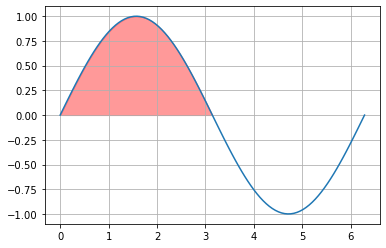

In [7]:
#| echo: false
from numpy import linspace,pi,sin
from matplotlib import pyplot as plt

x = linspace(0,pi,100)
y = sin(x)
xTwo = linspace(0,2 *pi, 100)
yTwo = sin(xTwo)

plt.fill_between(x,y,color = 'r',alpha = 0.4)
plt.plot(xTwo,yTwo)
plt.grid(True)
plt.axis('on')


When working with discrete data, the integral of the underlying function can be approximated as a sum of the area of many rectangles.  This can be written mathematically as
$$
\begin{align*}
\int f(x) dx &\approx  dx  f(x_1) + dx f(x_2) + \dots\\
&= dx \sum_i f(x_i)
\end{align*}
$$

The smaller the width of the rectangles, the better the approximation. 


(-0.6440264939859076,
 6.613052535806514,
 -1.0998615404412626,
 1.0998615404412626)

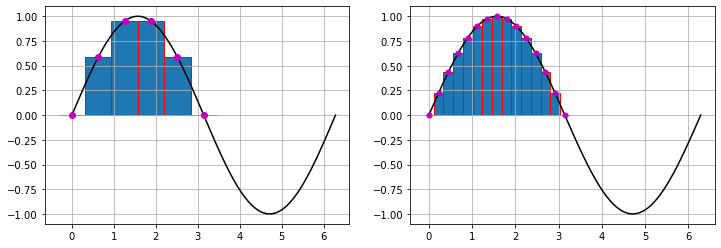

In [8]:
#| echo: false
from numpy import linspace,pi
from matplotlib import pyplot as plt
x = linspace(0,pi,100)
y = sin(x)
xTwo = linspace(0,2 *pi, 100)
yTwo = sin(xTwo)

xCourse,dxCourse = linspace(0,pi,15,retstep = True)
yCourse = sin(xCourse)

xCourseTwo,dxCourseTwo = linspace(0,pi,6,retstep = True)
yCourseTwo = sin(xCourseTwo)

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#plt.fill_between(x,y,color = 'r',alpha = 0.4)
ax2.bar(xCourse,yCourse,edgecolor = "red",width = dxCourse)
ax2.plot(xTwo,yTwo,'k')
ax2.plot(xCourse,yCourse,'m.',ms = 10)
ax2.grid(True)
ax2.axis('on')

ax1.bar(xCourseTwo,yCourseTwo,edgecolor = "red",width = dxCourseTwo)
ax1.plot(xTwo,yTwo,'k')
ax1.plot(xCourseTwo,yCourseTwo,'m.',ms = 12)
ax1.grid(True)
ax1.axis('on')


Let's use the rectangle rule to approximate the integral of a simple function and compare to the true answer to check for accuracy.
$$
\int_0^\pi \sin(x) dx 
$$

In [9]:
from numpy import linspace,sin,cos,pi
x,dx = linspace(0,pi,100,retstep=True)
y = sin(x)

integral = dx * sum(y)
print(integral)
print(-(cos(pi) - cos(0)))

1.9998321638939924
2.0


Notice that I used the `retstep = True` keyword argument when calling `linspace` to retrieve the width of the rectangles.   

### Trapezoid Integration

We can improve upon the rectangle approximation to the integral by replacing the rectangles with trapezoids.  You may recall that the area of a trapezoid is

$$
A = {\Delta x \over 2} \left( f(a) + f(b)\right)
$$


(-0.15707963267948966,
 3.2986722862692828,
 -0.049993706383693756,
 1.049867834057569)

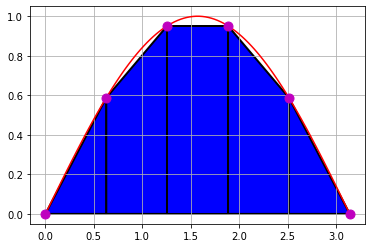

In [10]:
#| echo: false

from numpy import linspace,pi,array
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon



x = linspace(0,pi,100)
y = sin(x)
xTwo = linspace(0,pi, 100)
yTwo = sin(xTwo)

xCourse,dxCourse = linspace(0,pi,6,retstep = True)
yCourse = sin(xCourse)

fig,ax = plt.subplots()
ax.plot(xTwo,yTwo,'r')
ax.plot(xCourse,yCourse,'m.',ms = 18)

for n in range(5):
    y = array([[xCourse[n],0], [xCourse[n+1],0], [xCourse[n+1],yCourse[n+1]], [xCourse[n],yCourse[n]], [xCourse[n],0]]) 
    p = Polygon(y, facecolor = 'b',edgecolor = "k",lw=2)
    ax.add_patch(p)


ax.grid(True)
ax.axis('on')


If we add up the area of all of these trapezoids we get

$$
\begin{align*}
\int_a^b f(x) dx &= {\Delta x \over 2} \left( f(x_0) + f(x_1)\right) + {\Delta x \over 2} \left( f(x_1) + f(x_2)\right) + {\Delta x \over 2} \left( f(x_2) + f(x_3)\right) \dots \\
 &= {\Delta x \over 2} \left( f(x_0) + 2 f(x_1) + 2 f(x_2) + \dots 2 f(x_{n-1}) + f(x_n)\right)
\end{align*}
$$


Let's use the trapezoid rule to integrate the function
$$
y(x) = \exp{-0.05 x} \cos(x)
$$

and see how it compares to the rectangle rule.  We'll also use sympy to see that the exact value is for comparison.

In [11]:
from numpy import linspace,exp,cos,pi
import sympy as sp
x,dx = linspace(0,pi,6,retstep=True)
y = exp(-0.05 * x) * cos(x)

integralrectangle = dx * sum(y)
integraltrapezoid = dx /2 * (2 * sum(y[1:-1]) + y[0] + y[-1])

xvar = sp.Symbol("x")
expression = sp.exp(-0.05 * xvar) * sp.cos(xvar)
exact = sp.integrate(expression,(xvar,0,sp.pi))

print(integralrectangle)
print(integraltrapezoid)
display(sp.N(exact))

0.14127987124712144
0.0956124235314592


0.0925005485861962

Notice that even with only 6 data points, using trapezoids did quite a bit better than using rectangles.  There are other more sophisticated methods for integrating a function that you will learn about in other classes.


### Indefinite Integrals
The result of a definite integral is a single number; the area under the curve from the lower bound to the upper bound.  The result of an indefinite integral is a function which gives the area under the curve starting at $x = 0$ and ending at any value of $x$ of your choosing.  To perform an indefinite integral using a discrete data set, simply perform a definite integral from $x = 0$ to every other x value in your range separately, saving each value in a list for later use.   Let's demonstrate this in the cell below.


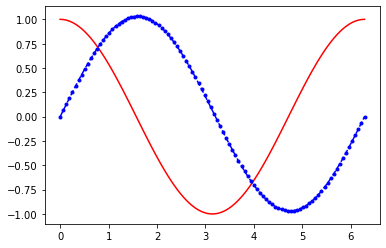

In [12]:
from numpy import linspace, sin,cos,pi
from matplotlib import pyplot as plt

x,dx = linspace(0,2 * pi,100,retstep = True)
y = cos(x)

integral = [dx * sum(y[:n]) for n in range(len(x))]
plt.plot(x,y,'r')
plt.plot(x,integral,'b--.')
plt.show()


The value of the blue curve gives the area under the red curve from $x = 0$ to any value of x you want to consider.  You should verify that this is true for a few points. 


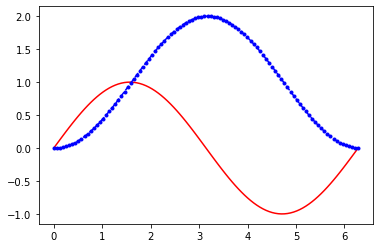

In [13]:
from numpy import linspace, sin,cos,pi
from matplotlib import pyplot as plt

x,dx = linspace(0,2 * pi,100,retstep = True)
y = sin(x)

integral = [dx * sum(y[:n]) for n in range(len(x))]
plt.plot(x,y,'r')
plt.plot(x,integral,'b--.')
plt.show()


## Flashcards
1. Write down the equation for the center difference first derivative.
2. Write down the equation for the center difference second derivative.
3. Write down the equation for the integral approximation using rectangles.
4. Write down the equation for the integral approximation using trapezoids.

## Exercises
1. Follow the steps below to calculate the first and second derivative of the following function $$y(x) = {\sin(x) \over x}$$  
   1. Generate a discrete grid of 20 equally-spaced points from $0< x < 10$.
   2. Generate an array of function values by evaluating the function above on the grid of points from step 1.
   3. Use the center-difference equation to generate an array of slope values.
   4. Use the center-difference second derivative equation to generate an array of second derivatives.
   5. Plot all three functions on the same axes and verify that they look right.  


C:\Users\bryce\AppData\Local\Temp/ipykernel_27408/4195149752.py:3: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(x)/x


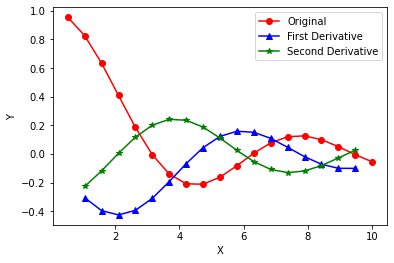

In [15]:
import numpy as np
x,dx = np.linspace(0,10,20,retstep=True)
y = np.sin(x)/x
yprime = (y[2:] - y[:-2])/(2 * dx)
yprimeprime = (y[2:] - 2 * y[1:-1] + y[:-2])/dx**2
plt.plot(x,y,color='r',marker='o',label='Original')
plt.plot(x[1:-1],yprime,color='b',marker='^',label='First Derivative')
plt.plot(x[1:-1],yprimeprime,color='g',marker='*',label='Second Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

2. Follow the steps below to calculate the definite and indefinite integral of the following function $$F(t) = e^{-(t - 5)^2 \over .05} $$ from $0<t<10$ seconds.  
   1. Generate a discrete grid of 20 equally-spaced points from $0< t < 10$.
   2. Generate an array of function values by evaluating the function above on the grid of points from step 1.
   3. Using the rectangle equation, approximate the integral.
   4. Using the trapezoid equation, approximate the integral.
   5. Using `sympy` evaluate the integral and compare to your approximations.
   6. Modify the number of grid points until your approximations are within $0.001$ of the true result.

In [16]:
t,dt = np.linspace(0,10,40,retstep=True)
F = np.exp(-(t-5)**2/0.05)
rec = dt*sum(F)
trap = dt /2 * (2 * sum(F[1:-1]) + F[0] + F[-1])
import sympy as sp
t = sp.Symbol('t')
F = sp.exp(-(t-5)**2/0.05)
print(f'{rec:.3f},{trap:.3f},{sp.N(sp.integrate(F,(t,0,10))):.3f}')

0.396,0.396,0.396


3. [This file](https://lancejnelson.github.io/PH135/files/Redbull_jump_full.csv) contains data from Felix Baumgartner's 2012 jump from an altitude of $39$ km above the surface of the earth.  Complete the following:

   1. Read the data file into a pandas dataframe.
   2. Plot altitude vs. time.
   3. Using the center-difference formula, calculate the derivative of this data.  What quantity do you get when you take a derivative of position vs. time data?
   3. Calculate the second derivative of this data.  What quantity do you get when you take a second derivative of position vs. time data?
   4. Plot the derivatives and inspect them to verify that they make sense.
   5. The original data set has a column that contains the Felix's airspeed (in km/hour). Plot this column vs. time and compare to the derivative you performed to see if they match (or are close).


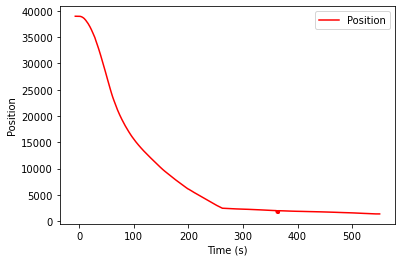

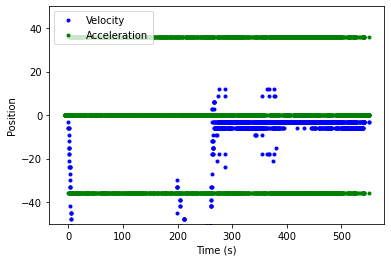

In [37]:
import pandas as pd
df=pd.read_csv('Redbull_jump_full.csv')
plt.plot(df['time (s)'],df['Altitude (m)'],'r',label='Position')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.show()

time,position=np.array(df['time (s)']),np.array(df['Altitude (m)'])
velocity = (position[2:]-position[:-2])/(2*(time[1]-time[0]))
plt.plot(time[1:-1],velocity,'b.',label='Velocity')
acceleration = (position[2:]-2*position[1:-1]+position[:-2])/(time[1]-time[0])**2
plt.plot(time[1:-1],acceleration,'g.',label='Acceleration')

plt.legend()
plt.xlabel('Time (s)')
plt.ylim(-50,50)
plt.ylabel('Position')
plt.show()

### In Class

8.27,24.969
(9.59,-8.37)


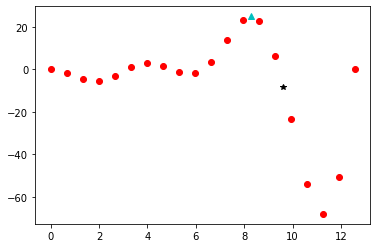

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x,h = np.linspace(0,4*np.pi,20,retstep=True)
y = np.sin(x)*(x**2-5*x)

plt.plot(x,y,'ro')

quadInt = 1/8*(3*y[-8]+6*y[-7]-y[-6])
plt.plot(x[-8]+h/2,quadInt,'c^')
print(f'{x[-8]+h/2:.2f},{quadInt:.3f}')

linInt = y[-6]+1/2*(y[-5]-y[-6])
plt.plot(x[-6]+h/2,linInt,'k*')
print(f'({x[-6]+h/2:.2f},{linInt:.2f})')

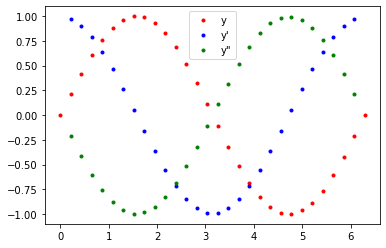

In [19]:
x,dx = np.linspace(0,2*np.pi,30,retstep=True)
y = np.sin(x)#+np.random.normal(0,0.07,size=len(x))

plt.plot(x,y,'r.',label='y')
yprime = (y[2:]-y[:-2])/(2*dx)
yprimeprime = (y[2:]-2*y[1:-1]+y[:-2])/(dx**2)
plt.plot(x[1:-1],yprime,'b.',label="y'")
plt.plot(x[1:-1],yprimeprime,'g.',label='y"')
plt.legend()

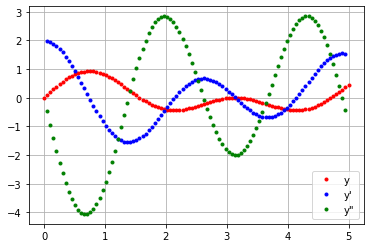

In [27]:
x=np.array([0.0, 0.050505050505050504, 0.10101010101010101, 0.15151515151515152, 0.20202020202020202, 0.25252525252525254, 0.30303030303030304, 0.35353535353535354, 0.40404040404040403, 0.45454545454545453, 0.5050505050505051, 0.5555555555555556, 0.6060606060606061, 0.6565656565656566, 0.7070707070707071, 0.7575757575757576, 0.8080808080808081, 0.8585858585858586, 0.9090909090909091, 0.9595959595959596, 1.0101010101010102, 1.0606060606060606, 1.1111111111111112, 1.1616161616161615, 1.2121212121212122, 1.2626262626262625, 1.3131313131313131, 1.3636363636363635, 1.4141414141414141, 1.4646464646464645, 1.5151515151515151, 1.5656565656565655, 1.6161616161616161, 1.6666666666666667, 1.7171717171717171, 1.7676767676767677, 1.8181818181818181, 1.8686868686868687, 1.9191919191919191, 1.9696969696969697, 2.0202020202020203, 2.0707070707070705, 2.121212121212121, 2.1717171717171717, 2.2222222222222223, 2.2727272727272725, 2.323232323232323, 2.3737373737373737, 2.4242424242424243, 2.474747474747475, 2.525252525252525, 2.5757575757575757, 2.6262626262626263, 2.676767676767677, 2.727272727272727, 2.7777777777777777, 2.8282828282828283, 2.878787878787879, 2.929292929292929, 2.9797979797979797, 3.0303030303030303, 3.080808080808081, 3.131313131313131, 3.1818181818181817, 3.2323232323232323, 3.282828282828283, 3.3333333333333335, 3.3838383838383836, 3.4343434343434343, 3.484848484848485, 3.5353535353535355, 3.5858585858585856, 3.6363636363636362, 3.686868686868687, 3.7373737373737375, 3.7878787878787876, 3.8383838383838382, 3.888888888888889, 3.9393939393939394, 3.9898989898989896, 4.040404040404041, 4.090909090909091, 4.141414141414141, 4.191919191919192, 4.242424242424242, 4.292929292929293, 4.343434343434343, 4.393939393939394, 4.444444444444445, 4.494949494949495, 4.545454545454545, 4.595959595959596, 4.646464646464646, 4.696969696969697, 4.747474747474747, 4.797979797979798, 4.848484848484849, 4.898989898989899, 4.94949494949495, 5.0])
y=np.array([0.0, 0.10080627013894136, 0.20039300736245047, 0.2975578841362396, 0.39113272244278785, 0.4799999195124768, 0.5631081060997429, 0.6394868002558715, 0.7082598352559745, 0.7686573594990194, 0.820026228513452, 0.861838634314173, 0.8936988448723235, 0.9153479559425838, 0.9266665884775594, 0.9276754968557884, 0.9185340856536202, 0.8995368651885386, 0.8711079080396319, 0.8337933997055371, 0.7882524060034812, 0.7352460072813896, 0.6756249745764152, 0.6103161851140477, 0.5403079936532266, 0.46663479184587775, 0.3903609997501044, 0.31256474172985654, 0.23432146306678142, 0.1566877436423849, 0.08068556102523167, 0.007287247287916877, -0.06259862798571318, -0.12814023156744175, -0.18859409932386087, -0.2433152518631842, -0.29176564191071663, -0.3335208093699928, -0.36827464907752855, -0.395842226759571, -0.416160610160935, -0.42928771423590223, -0.4353991911591653, -0.4347834272221387, -0.4278347389271538, -0.4150448892969201, -0.3969930721219712, -0.37433453614965617, -0.34778804268865143, -0.3181223684221736, -0.28614208010086095, -0.25267281898764987, -0.21854634027581646, -0.18458555608326915, -0.15158982999035117, -0.12032076644822688, -0.09148872981796116, -0.06574031544694416, -0.043646979250327275, -0.025695012998821234, -0.012277030232053029, -0.003685102778330431, -0.00010566066928446266, -0.0016162392295954197, -0.008184126765070606, -0.01966693505547487, -0.035815083284221914, -0.056276154613521034, -0.08060105384664593, -0.10825186500394741, -0.13861127965298115, -0.17099344092649948, -0.204656024752707, -0.238813359287766, -0.2726503662128265, -0.30533709371725687, -0.33604360086100427, -0.3639549467574003, -0.3882860357465927, -0.40829607147869723, -0.42330237857004005, -0.43269336014678306, -0.4359403729965625, -0.4326083189990634, -0.4223647717324934, -0.4049874803338696, -0.380370118458656, -0.3485261741297144, -0.30959090594184524, -0.26382132202345365, -0.21159416985770146, -0.15340195702595955, -0.08984705464586801, -0.021633966227982047, 0.05044012562636268, 0.12549639429348197, 0.20258681977679807, 0.2807078655506779, 0.35881517197513585, 0.4358390397117691])
plt.plot(x,y,'r.',label='y')
yp = (y[2:]-y[:-2])/(2*(x[1]-x[0]))
ypp = (y[2:]-2*y[1:-1]+y[:-2])/(x[1]-x[0])**2
plt.plot(x[1:-1],yp,'b.',label="y'")
plt.plot(x[1:-1],ypp,'g.',label='y"')
plt.grid()
plt.legend()

In [54]:
x,dx = np.linspace(0.001,2*np.pi,10000,retstep=True)
y = np.sin(x)/x
rec = dx*sum(y)
trap = dx/2 * (2*sum(y[1:-1])+y[0]+y[-1])
print(rec,trap,1.4185)

1.4174657220615905 1.4171515814345204 1.4185
